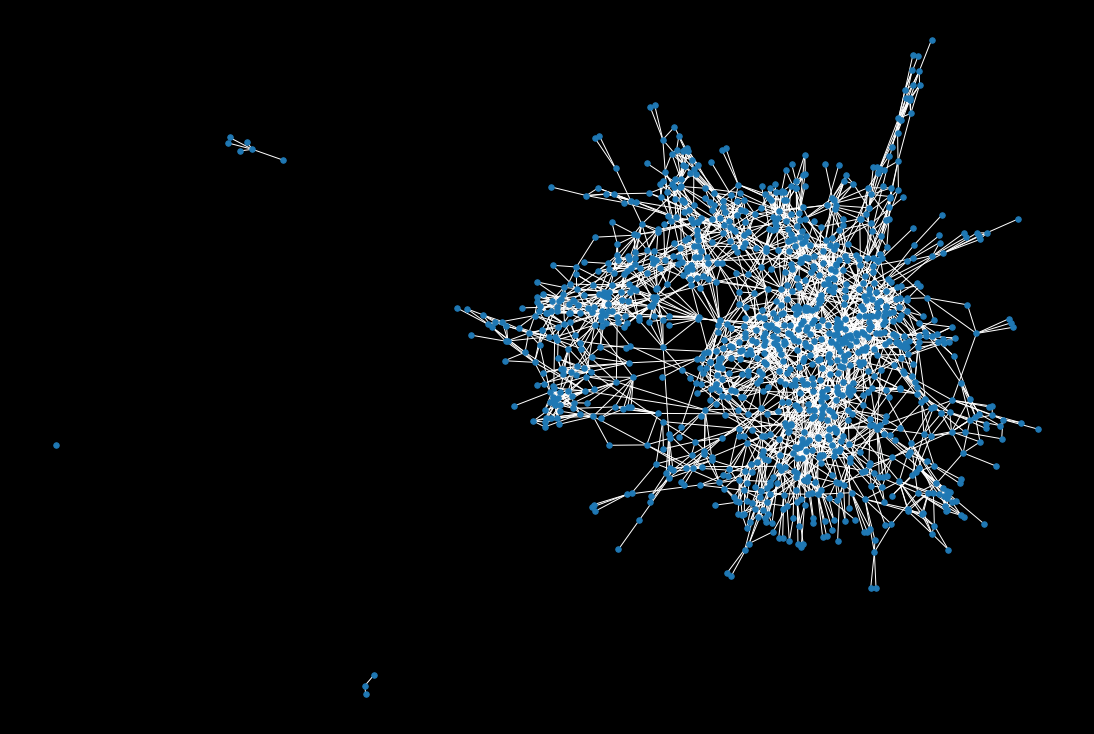

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import sample

link = ("https://github.com/dnllvrvz/Social-Network-Dataset/"
        "raw/master/Social%20Network%20Dataset.xlsx")

network_data = pd.read_excel(link, sheet_name=['Elements', 'Connections'])
elements_data = network_data['Elements'] # node list
connections_data = network_data['Connections'] # edge list
edge_cols = ['Type', 'Weight', 'When']
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                               source='From',
                                               target='To',
                                               edge_attr=edge_cols)

node_dict = elements_data.set_index('Label').to_dict(orient='index')
nx.set_node_attributes(graph, node_dict)

fig = plt.figure(figsize=(15, 10))
nx.draw(graph, 
        node_size=30,
        edge_color='white')
fig.set_facecolor('black')

In [2]:
len(graph.nodes),len(graph.edges)

(1193, 2947)

In [3]:
node=sample(graph.nodes,1)[0]
graph.nodes[node]

{'Type': 'Student', 'School (ID)': 55, 'Answered the form': 'No'}

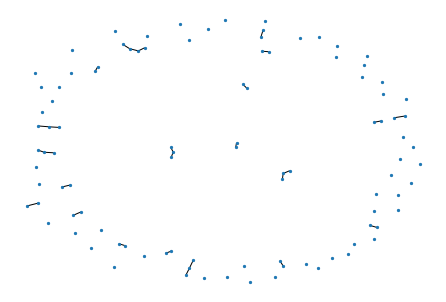

In [4]:
sampled_nodes=sample(graph.nodes,100)
sub_graph=graph.subgraph(sampled_nodes)
nx.draw(sub_graph, node_size=5, with_labels=False)

In [7]:
from collections import defaultdict
nodes_school_id=nx.get_node_attributes(graph,'School (ID)')
school_nodes=defaultdict(list)
#print (school_nodes.items())
for node,school_id in nodes_school_id.items():
    school_nodes[school_id].append(node)

In [11]:
school_nodes[5]

['S-82d78a', 'S-087f53']

In [12]:
graph.nodes['S-087f53']

{'Type': 'Student', 'School (ID)': 5, 'Answered the form': 'No'}

In [13]:
subgraphs={}
for school_id, nodes in school_nodes.items():
    subgraph=graph.subgraph(nodes)
    subgraphs[school_id]=subgraph

In [14]:
subgraphs[5].nodes

NodeView(('S-82d78a', 'S-087f53'))

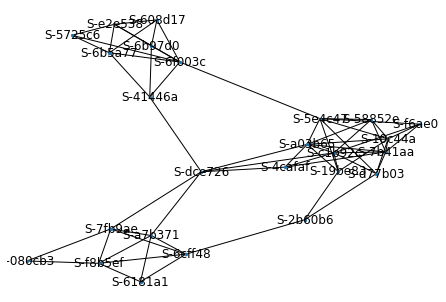

In [15]:
nx.draw(subgraphs[3],node_size=5,with_labels=True)